# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# Connect to MySQL

In [2]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345678",
    database="marketing_analysis"
)

print("Connected to MySQL successfully")


Connected to MySQL successfully


# Read Data

In [3]:
query = """
SELECT
    c.campaign_id,
    c.campaign_name,
    c.channel,
    c.region,
    p.date,
    p.impressions,
    p.clicks,
    p.conversions,
    p.revenue,
    c.budget
FROM campaigns c
JOIN campaign_performance p
ON c.campaign_id = p.campaign_id
"""

df = pd.read_sql(query, conn)
df.head()

C:\Users\Mukul\AppData\Local\Temp\ipykernel_10776\1376274387.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,campaign_id,campaign_name,channel,region,date,impressions,clicks,conversions,revenue,budget
0,1,Email Blast Q1,Email,North,2024-01-05,120000,6000,900,135000.0,50000.0
1,1,Email Blast Q1,Email,North,2024-01-20,100000,5200,780,118000.0,50000.0
2,2,Social Media Push,Social Media,South,2024-01-25,150000,7200,850,98000.0,75000.0
3,2,Social Media Push,Social Media,South,2024-02-05,160000,7600,920,110000.0,75000.0
4,3,Google Search Ads,Search,West,2024-02-10,200000,9000,1200,210000.0,120000.0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   campaign_id    9 non-null      int64  
 1   campaign_name  9 non-null      object 
 2   channel        9 non-null      object 
 3   region         9 non-null      object 
 4   date           9 non-null      object 
 5   impressions    9 non-null      int64  
 6   clicks         9 non-null      int64  
 7   conversions    9 non-null      int64  
 8   revenue        9 non-null      float64
 9   budget         9 non-null      float64
dtypes: float64(2), int64(4), object(4)
memory usage: 852.0+ bytes


,campaign_id,impressions,clicks,conversions,revenue,budget
count,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000
mean,3.000000,150000.000000,6944.444444,940.00000,140444.444444,75555.555556
std,1.732051,44440.972087,1772.788137,216.91012,51235.024912,29521.649307
min,1.000000,90000.000000,4800.000000,620.00000,88000.000000,40000.000000
25%,2.000000,120000.000000,5200.000000,850.00000,110000.000000,50000.000000
50%,3.000000,150000.000000,7200.000000,900.00000,125000.000000,75000.000000
75%,4.000000,180000.000000,8200.000000,950.00000,140000.000000,90000.000000
max,6.000000,220000.000000,9500.000000,1350.00000,240000.000000,120000.000000


# KPI Calculation

In [5]:
df["ctr"] = df["clicks"] / df["impressions"]
df["conversion_rate"] = df["conversions"] / df["clicks"]
df.head()

,campaign_id,campaign_name,channel,region,date,impressions,clicks,conversions,revenue,budget,ctr,conversion_rate
0,1,Email Blast Q1,Email,North,2024-01-05,120000,6000,900,135000.0,50000.0,0.0500,0.150000
1,1,Email Blast Q1,Email,North,2024-01-20,100000,5200,780,118000.0,50000.0,0.0520,0.150000
2,2,Social Media Push,Social Media,South,2024-01-25,150000,7200,850,98000.0,75000.0,0.0480,0.118056
3,2,Social Media Push,Social Media,South,2024-02-05,160000,7600,920,110000.0,75000.0,0.0475,0.121053
4,3,Google Search Ads,Search,West,2024-02-10,200000,9000,1200,210000.0,120000.0,0.0450,0.133333


# Campaign Aggregation

In [7]:
campaign_summary = df.groupby(
    ["campaign_name", "channel", "region", "budget"],
    as_index=False
).agg({
    "impressions": "sum",
    "clicks": "sum",
    "conversions": "sum",
    "revenue": "sum",
    "ctr": "mean",
    "conversion_rate": "mean"
})

campaign_summary


,campaign_name,channel,region,budget,impressions,clicks,conversions,revenue,ctr,conversion_rate
0,Display Retargeting,Display,East,60000.0,130000,5000,620,88000.0,0.038462,0.124000
1,Email Blast Q1,Email,North,50000.0,220000,11200,1680,253000.0,0.051000,0.150000
2,Email Loyalty Campaign,Email,North,40000.0,90000,4800,890,140000.0,0.053333,0.185417
3,Google Search Ads,Search,West,120000.0,420000,18500,2550,450000.0,0.044091,0.137719
4,Instagram Influencers,Social Media,West,90000.0,180000,8200,950,125000.0,0.045556,0.115854
5,Social Media Push,Social Media,South,75000.0,310000,14800,1770,208000.0,0.047750,0.119554


# ROI Calculation

In [8]:
campaign_summary["roi"] = (
    campaign_summary["revenue"] - campaign_summary["budget"]
) / campaign_summary["budget"]

campaign_summary.sort_values("roi", ascending=False)

,campaign_name,channel,region,budget,impressions,clicks,conversions,revenue,ctr,conversion_rate,roi
1,Email Blast Q1,Email,North,50000.0,220000,11200,1680,253000.0,0.051000,0.150000,4.060000
3,Google Search Ads,Search,West,120000.0,420000,18500,2550,450000.0,0.044091,0.137719,2.750000
2,Email Loyalty Campaign,Email,North,40000.0,90000,4800,890,140000.0,0.053333,0.185417,2.500000
5,Social Media Push,Social Media,South,75000.0,310000,14800,1770,208000.0,0.047750,0.119554,1.773333
0,Display Retargeting,Display,East,60000.0,130000,5000,620,88000.0,0.038462,0.124000,0.466667
4,Instagram Influencers,Social Media,West,90000.0,180000,8200,950,125000.0,0.045556,0.115854,0.388889


# Revenue by Channel

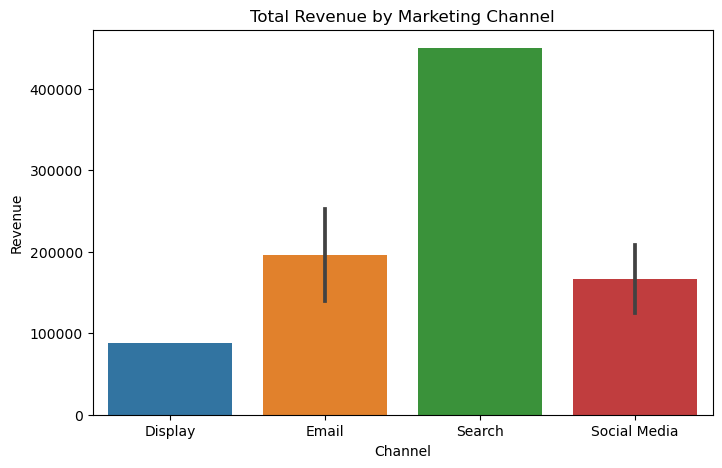

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=campaign_summary,
    x="channel",
    y="revenue"
)
plt.title("Total Revenue by Marketing Channel")
plt.xlabel("Channel")
plt.ylabel("Revenue")
plt.show()

# ROI by Campaign

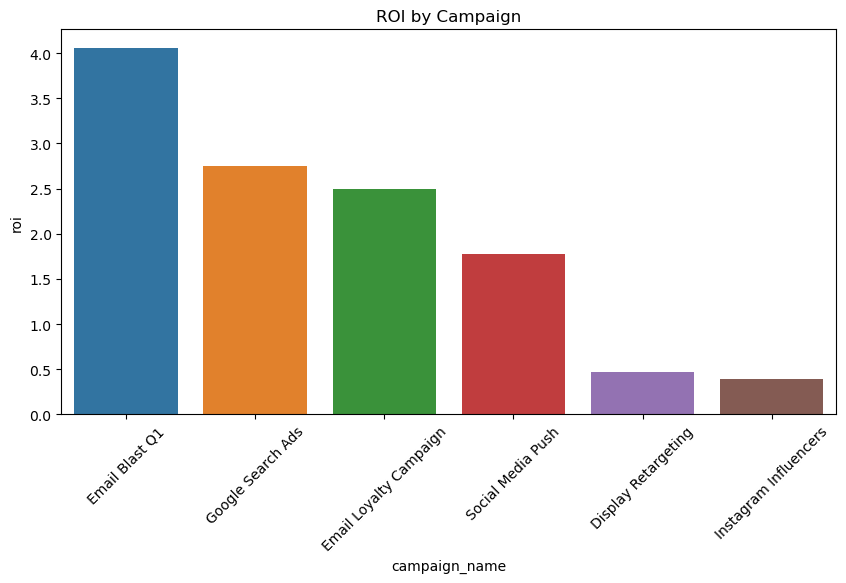

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=campaign_summary.sort_values("roi", ascending=False),
    x="campaign_name",
    y="roi"
)
plt.xticks(rotation=45)
plt.title("ROI by Campaign")
plt.show()

# Customer Acquisition Cost (CAC) Analysis

In [12]:
cac_query = """
SELECT
    cu.segment,
    a.acquisition_cost
FROM customers cu
JOIN customer_acquisition a
ON cu.customer_id = a.customer_id
"""

cac_df = pd.read_sql(cac_query, conn)
cac_df.head()

C:\Users\Mukul\AppData\Local\Temp\ipykernel_10776\626906498.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cac_df = pd.read_sql(cac_query, conn)


,segment,acquisition_cost
0,New,120.0
1,Returning,180.0
2,New,200.0
3,Returning,110.0
4,High Value,160.0


# Calculate CAC by Segment

In [13]:
cac_summary = cac_df.groupby("segment", as_index=False).agg({
    "acquisition_cost": "mean"
})

cac_summary.rename(columns={"acquisition_cost": "avg_cac"}, inplace=True)
cac_summary

,segment,avg_cac
0,High Value,160.0
1,New,170.0
2,Returning,145.0


# CAC by Customer Segment

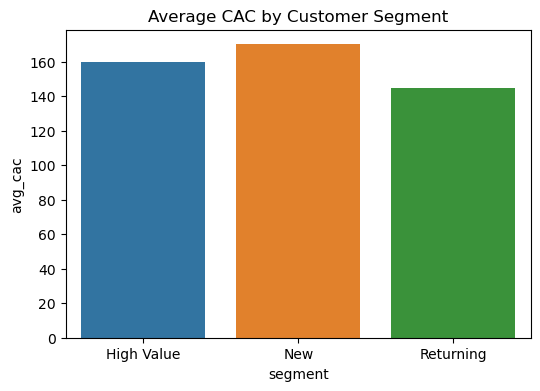

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=cac_summary,
    x="segment",
    y="avg_cac"
)
plt.title("Average CAC by Customer Segment")
plt.show()

# Key Insights

- Email campaigns show higher conversion rates with relatively lower budgets
- Paid search campaigns generate high revenue but moderate ROI
- North region contributes significantly to total revenue
- Returning customers have lower acquisition cost compared to new customers


# Business Recommendations

- Reallocate budget from low-ROI display campaigns to email campaigns
- Optimize paid search bidding strategy to improve ROI
- Focus marketing efforts on high-performing regions
- Target returning customers through loyalty-based campaigns
